<a href="https://colab.research.google.com/github/SebasQvdo/Portfolio/blob/main/Evaluating_Graphs_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
auto_data = pd.read_excel('/content/drive/MyDrive/Work 2/5to Semestre/Visualización de Datos/auto_dataset.xlsx')
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,American,ford torino


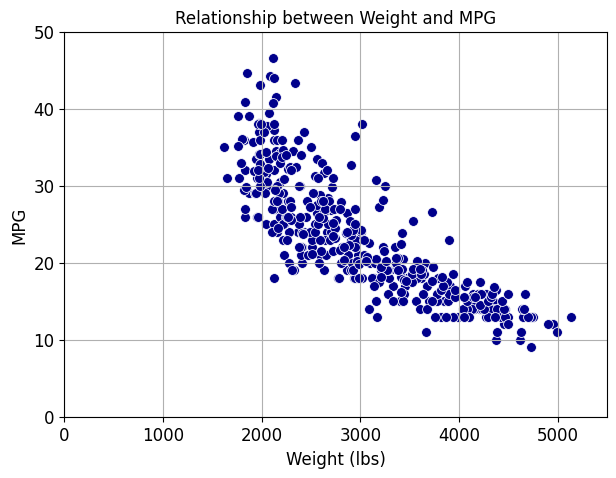

In [4]:
#Scatter plot distribution of data
plt.figure(figsize=(7,5))
sns.scatterplot(data=auto_data, x = 'weight', y = 'mpg', color = 'darkblue', marker = 'o', s = 50)

#Establish from the limits of the y axis
plt.ylim(0,50)
#Establish from the limits of the x axis
plt.xlim(0,5500)

#Personalize the graph with better visuals
plt.title('Relationship between Weight and MPG')
plt.xlabel('Weight (lbs)', fontsize=12)
plt.ylabel('MPG', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

#Display graph
plt.show()

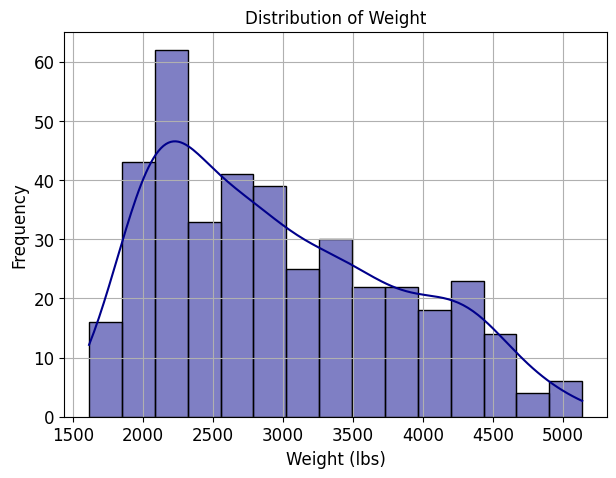

In [5]:
#Histogram (weight)
plt.figure(figsize=(7,5))
sns.histplot(data=auto_data, x = 'weight', color = 'darkblue', kde = True, bins = 15)

#Personalize the graph with better visuals
plt.title('Distribution of Weight')
plt.xlabel('Weight (lbs)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

#Display graph
plt.show()

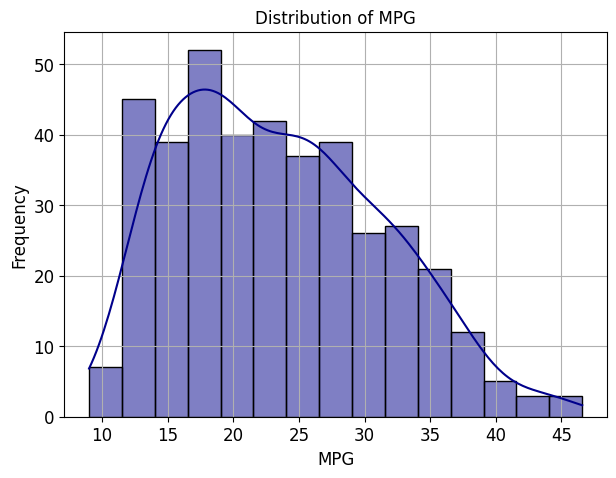

In [6]:
#Histogram (MPG)
plt.figure(figsize=(7,5))
sns.histplot(data=auto_data, x = 'mpg', color = 'darkblue', kde = True, bins = 15)

#Personalize the graph
plt.title('Distribution of MPG')
plt.xlabel('MPG', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

#Display graph
plt.show()

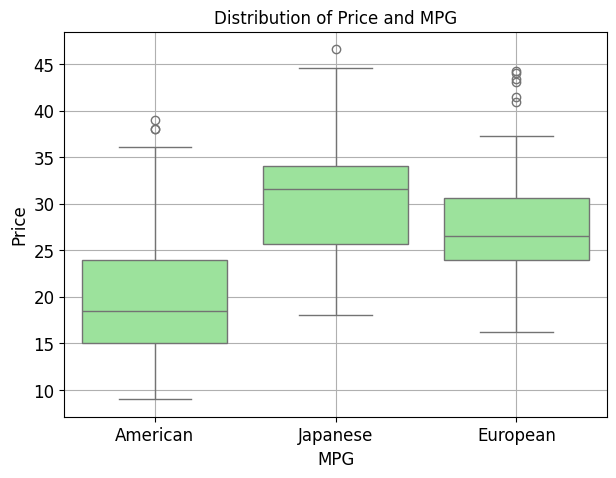

In [7]:
#Boxplot of car data
plt.figure(figsize=(7,5))
sns.boxplot(data=auto_data, x = 'origin', y = 'mpg', color = 'lightgreen')

#Personalize the graph with better visuals
plt.title('Distribution of Price and MPG')
plt.xlabel('MPG', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

#Display graph
plt.show()

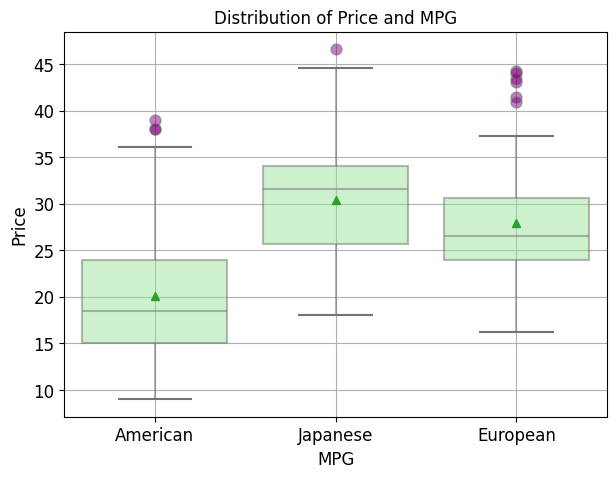

In [8]:
#More personalized boxplot
plt.figure(figsize=(7,5))
sns.boxplot(data=auto_data, x = 'origin', y = 'mpg', color = 'lightgreen',
            linewidth = 1.5, fliersize = 5, boxprops = dict(alpha = 0.5),
            whiskerprops = dict(alpha = 0.5), medianprops = dict(alpha = 0.5),
            showmeans = True, flierprops = dict(alpha = 0.5, color = 'red',
                                                marker = 'o', markerfacecolor = 'purple',
                                                markersize = 8),
            meanprops = dict(color = 'black'))

#Personalize the graph
plt.title('Distribution of Price and MPG')
plt.xlabel('MPG', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

#Display graph
plt.show()

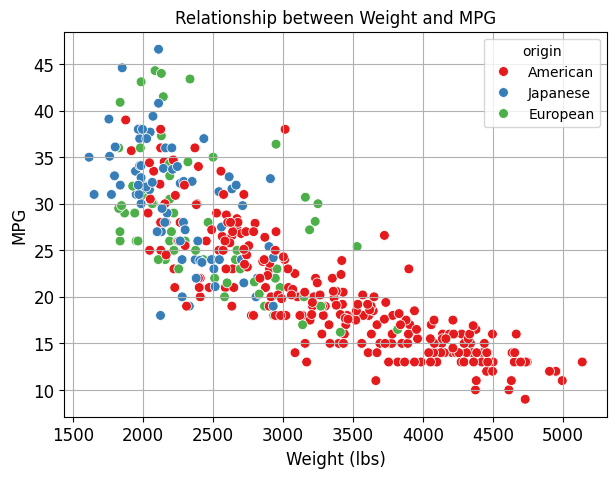

In [9]:
#Scatterplot of distribution of car weight per MPG with color separation specifying origin
plt.figure(figsize=(7,5))
sns.scatterplot(data=auto_data, x = 'weight', y = 'mpg', hue = 'origin', palette = 'Set1',
                marker = 'o', s = 50)

#Personalize the graph with better visuals
plt.title('Relationship between Weight and MPG')
plt.xlabel('Weight (lbs)', fontsize=12)
plt.ylabel('MPG', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

#Display graph
plt.show()

<Figure size 1200x600 with 0 Axes>

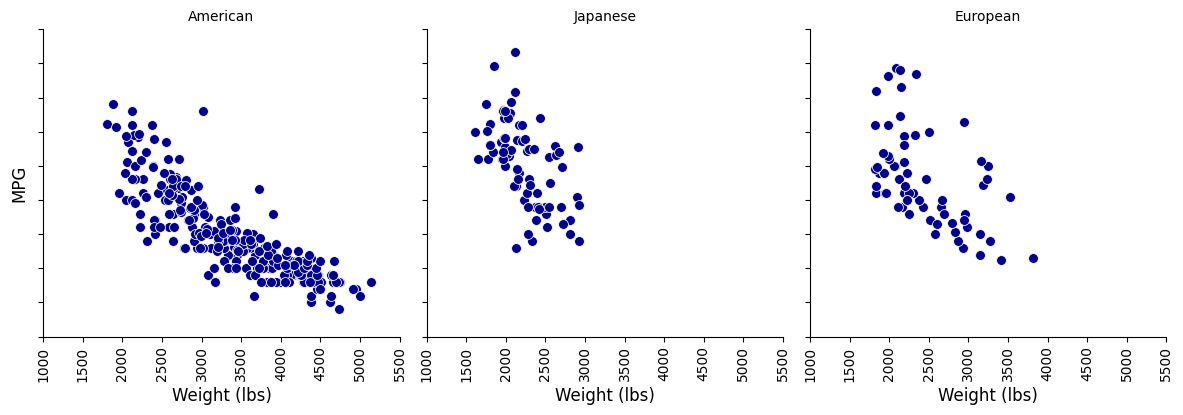

In [41]:
#Dividing scatterplot in 3 graphs, each one showcasing a different origin
plt.figure(figsize=(12,6))
g = sns.FacetGrid(auto_data, col = 'origin', col_wrap = 3, height = 4, aspect = 1)
g.map(sns.scatterplot, 'weight', 'mpg', color = 'darkblue', marker = 'o', s = 50)

#Personalizing the graphs
g.set_axis_labels('Weight (lbs)', 'MPG')
g.set_titles(col_template = '{col_name}')
g.set_xticklabels(fontsize = 6)
g.set_yticklabels(fontsize = 6)

#Rotating labels for better viewing
for ax in g.axes.flat:
    ax.set_xlabel('Weight (lbs)', fontsize=12)
    ax.set_ylabel('MPG', fontsize=12)
    ax.tick_params(axis='both', labelsize=10, rotation = 90)

#Display graph
plt.show()

In [11]:
sum_auto = (auto_data
            .filter(['mpg', 'origin'], axis = 1)
            .groupby('origin')
            .agg(meanMPG = ('mpg', 'mean'))
            .reset_index()
            .round(2)
            )
sum_auto

,origin,meanMPG
0,American,20.08
1,European,27.89
2,Japanese,30.45


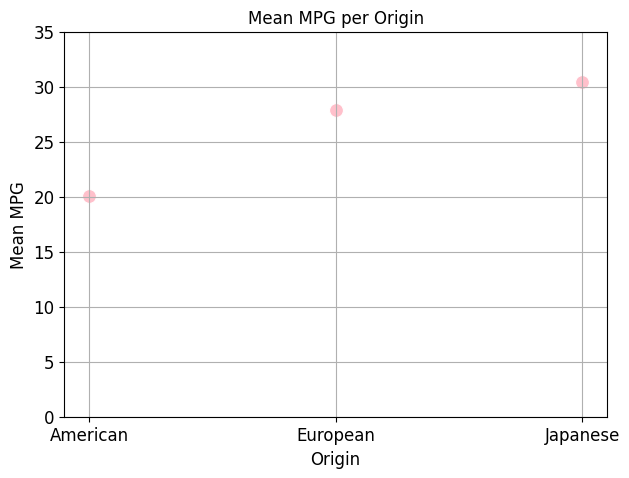

In [12]:
#Scatterplot diagram of Cleveland
plt.figure(figsize=(7,5))
sns.scatterplot(data=sum_auto, x = 'origin', y = 'meanMPG', color = 'pink', marker = 'o', s = 100)

#Personalize the graph
plt.title('Mean MPG per Origin')
plt.xlabel('Origin', fontsize=12)
plt.ylabel('Mean MPG', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,35) #Establish an axis limit on the y axis
plt.grid(True)

#Plot graph
plt.show()

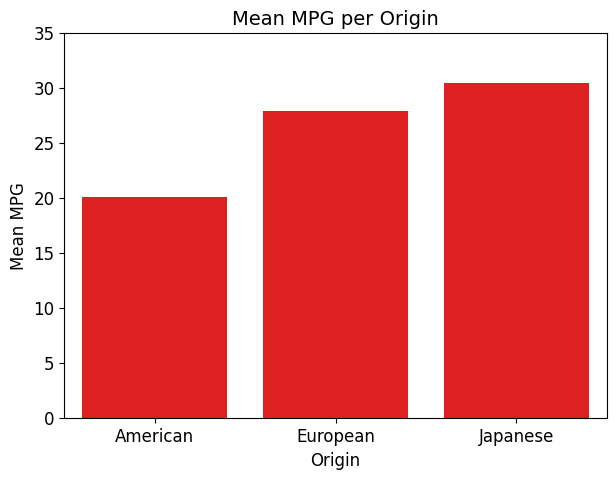

In [13]:
#Bar graph displaying the same thing
plt.figure(figsize=(7,5))
sns.barplot(data=sum_auto, x = 'origin', y = 'meanMPG', color = 'red')

#Personalize the graph
plt.title('Mean MPG per Origin', fontsize = 14)
plt.xlabel('Origin', fontsize=12)
plt.ylabel('Mean MPG', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,35) #Establish an axis limit on the y axis

#Plot graph
plt.show()

In [14]:
spotify_data = pd.read_excel('/content/drive/MyDrive/Work 2/5to Semestre/Visualización de Datos/spotify.xlsx')
spotify_data.head()

,Date,Day,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
0,2017-01-06,1,12287078,NaN,NaN,NaN,NaN
1,2017-01-07,2,13190270,NaN,NaN,NaN,NaN
2,2017-01-08,3,13099919,NaN,NaN,NaN,NaN
3,2017-01-09,4,14506351,NaN,NaN,NaN,NaN
4,2017-01-10,5,14275628,NaN,NaN,NaN,NaN


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Day'].plot(kind='hist', bins=20, title='Day')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Shape of You'].plot(kind='hist', bins=20, title='Shape of You')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Day', y='Shape of You', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Shape of You']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Shape of You')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Shape of You']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Shape of You')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Day'].plot(kind='line', figsize=(8, 4), title='Day')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Shape of You'].plot(kind='line', figsize=(8, 4), title='Shape of You')
plt.gca().spines[['top', 'right']].set_visible(False)

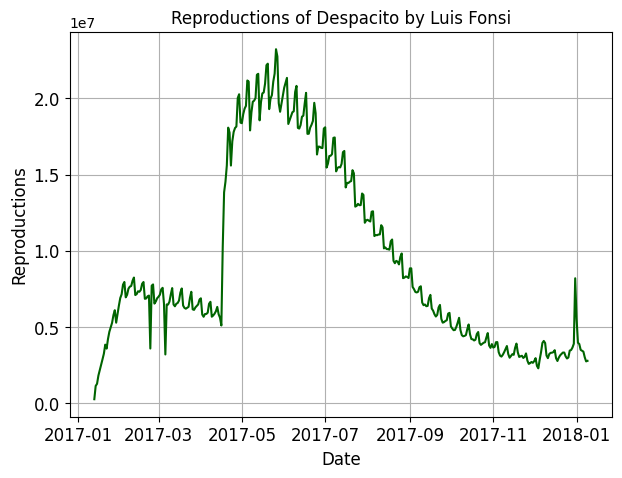

In [15]:
#Line graph of how the song Despacito by Luis Fonsi has been reproduced during the years
plt.figure(figsize=(7,5))
sns.lineplot(data=spotify_data, x = 'Date', y = 'Despacito', color = 'darkgreen', linewidth = 1.5, linestyle = '-')

#Personalize the graph with better visuals
plt.title('Reproductions of Despacito by Luis Fonsi')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Reproductions', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

#Display graph
plt.show()

In [43]:
#Graphing multiple lines
data_lines = spotify_data.melt(id_vars = ['Date'],
                               value_vars = ['Shape of You', 'Despacito', 'Something Just Like This', 'HUMBLE.', 'Unforgettable'],
                               var_name = 'Song',
                               value_name = 'Reproductions')

data_lines.head()

,Date,Song,Reproductions
0,2017-01-06,Shape of You,12287078.0
1,2017-01-07,Shape of You,13190270.0
2,2017-01-08,Shape of You,13099919.0
3,2017-01-09,Shape of You,14506351.0
4,2017-01-10,Shape of You,14275628.0


<Figure size 800x600 with 0 Axes>

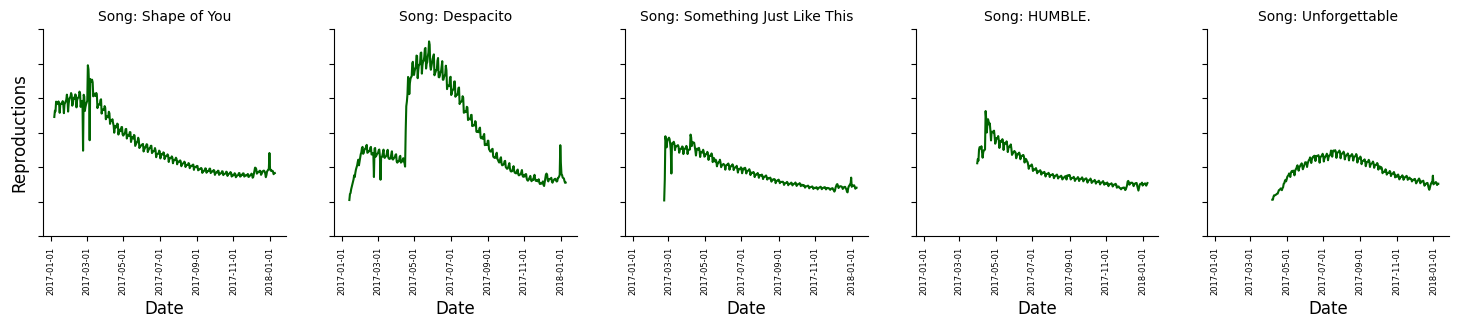

In [49]:
#Now create multiple graphs for each song using the recently used method
plt.figure(figsize=(8,6))
g = sns.FacetGrid(data_lines, col = 'Song')
g.map(sns.lineplot, 'Date', 'Reproductions', color = 'darkgreen', linewidth = 1.5, linestyle = '-')

#Personalize the graph
g.set_axis_labels('Date', 'Reproductions')
g.set_titles(col_template = 'Song: {col_name}')
g.set_xticklabels(fontsize = 6, rotation = 90)
g.set_yticklabels(fontsize = 6)

#Rotating labels
for ax in g.axes.flat:
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Reproductions', fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

#Display graph
plt.show()

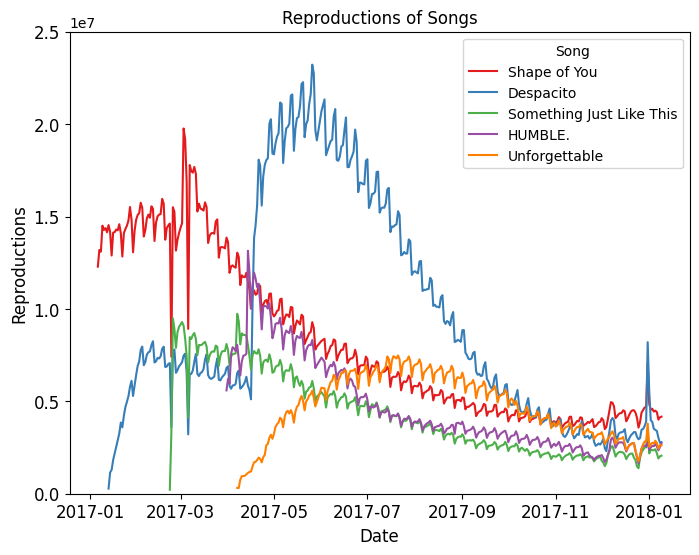

In [57]:
#Another option is to combine them into one graph using the legend to divide them
plt.figure(figsize=(8,6))
sns.lineplot(data=data_lines, x = 'Date', y = 'Reproductions', hue = 'Song', palette = 'Set1',
             linewidth = 1.5, linestyle = '-')

#Personalize the graph
plt.title('Reproductions of Songs')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Reproductions', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,25000000)

#Display graph
plt.show()

In [89]:
penguins_data = pd.read_excel('/content/drive/MyDrive/Work 2/5to Semestre/Visualización de Datos/penguins.xlsx')
penguins_data.head()
#Remove NaN data
penguins_data = penguins_data.dropna()

In [17]:
#Make sure variables are specified as categorical
penguins_data[['species', 'island', 'sex']] = (penguins_data
                                               .filter(['species', 'island', 'sex'])
                                               .astype('category')
                                               )

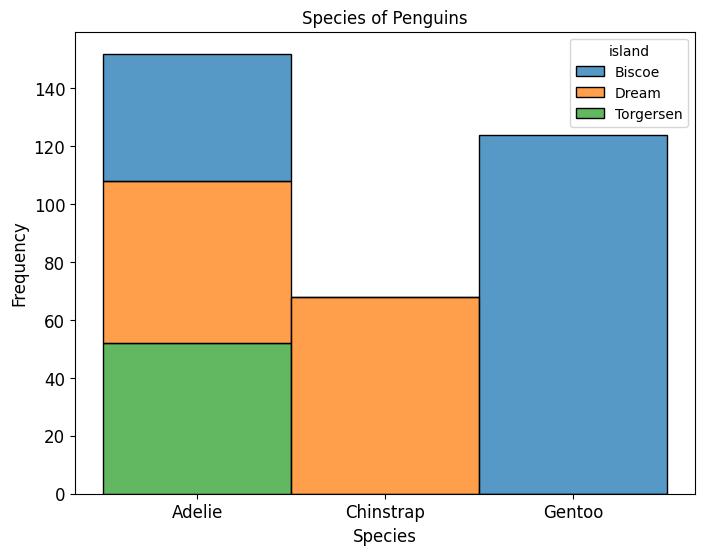

In [18]:
#Histogram of penguins' species per island
plt.figure(figsize=(8,6))
sns.histplot(data=penguins_data, x = 'species', hue = 'island', multiple = 'stack')

#Personalize the graph with better visuals
plt.title('Species of Penguins')
plt.xlabel('Species', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Display graph
plt.show()

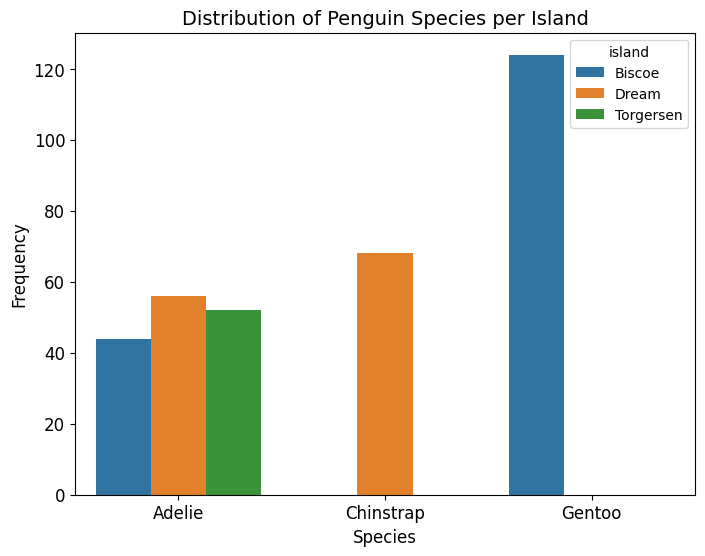

In [27]:
#Using parallel bar graphs
plt.figure(figsize=(8,6))
sns.countplot(data=penguins_data, x = 'species', hue = 'island')

#Personalize the graph
plt.title('Distribution of Penguin Species per Island', fontsize = 14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Display graph
plt.show()

In [33]:
#Statistic Summaries
count_data = (penguins_data
              .groupby(['island', 'species'])
              .size()
              .reset_index(name = 'count')
              .sort_values(by = 'count', ascending = False)
              )

/tmp/ipython-input-4085842394.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['island', 'species'])


In [34]:
#Show the result
print(count_data)

      island    species  count
2     Biscoe     Gentoo    124
4      Dream  Chinstrap     68
3      Dream     Adelie     56
6  Torgersen     Adelie     52
0     Biscoe     Adelie     44
1     Biscoe  Chinstrap      0
5      Dream     Gentoo      0
7  Torgersen  Chinstrap      0
8  Torgersen     Gentoo      0


In [38]:
#Calculating relative frequency
rel_freq_table = (penguins_data
                  .groupby(['island', 'species'])
                  .size()
                  .reset_index(name = 'count')
                  .assign(Proportion = lambda df: df['count'] / df['count'].sum())
                  )

/tmp/ipython-input-2151109662.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['island', 'species'])


In [39]:
# Showing relative frequency table
print(rel_freq_table)

      island    species  count  Proportion
0     Biscoe     Adelie     44    0.127907
1     Biscoe  Chinstrap      0    0.000000
2     Biscoe     Gentoo    124    0.360465
3      Dream     Adelie     56    0.162791
4      Dream  Chinstrap     68    0.197674
5      Dream     Gentoo      0    0.000000
6  Torgersen     Adelie     52    0.151163
7  Torgersen  Chinstrap      0    0.000000
8  Torgersen     Gentoo      0    0.000000


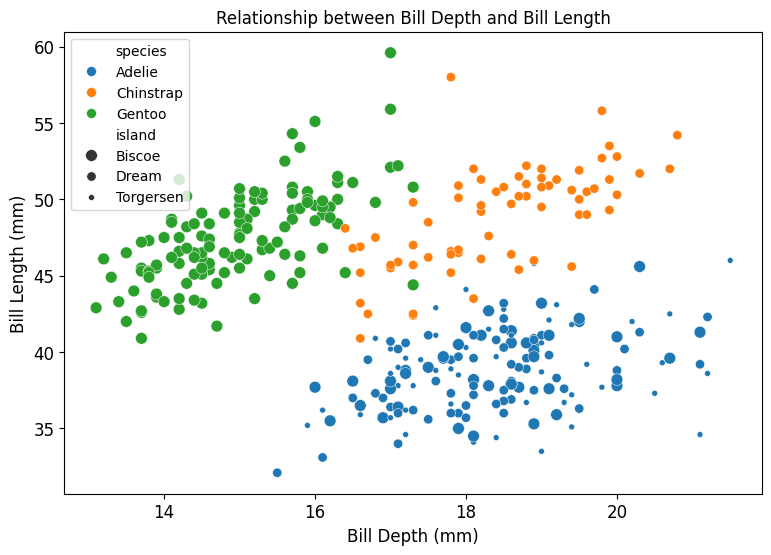

In [58]:
#Custom 4 variable scatterplot
plt.figure(figsize=(9,6))
sns.scatterplot(data=penguins_data, x = 'bill_depth_mm', y = 'bill_length_mm', hue = 'species', size = 'island',
                marker = 'o', s = 50)
#Personalize the graph
plt.title('Relationship between Bill Depth and Bill Length')
plt.xlabel('Bill Depth (mm)', fontsize=12)
plt.ylabel('Bill Length (mm)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Display graph
plt.show()

In [59]:
###
###
###
#.   Extra Graphs   .#
###
###
###

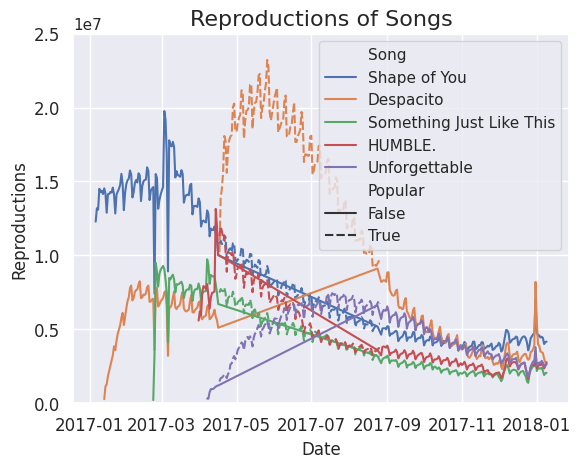

In [79]:
sns.set_theme(style="darkgrid")

# Adding a new column to classify popular songs
spotify_data['Popular'] = spotify_data['Despacito'] > spotify_data['Despacito'].mean()

# Recreate data_lines from spotify_data to ensure a clean merge
data_lines = spotify_data.melt(id_vars = ['Date', 'Popular'],
                               value_vars = ['Shape of You', 'Despacito', 'Something Just Like This', 'HUMBLE.', 'Unforgettable'],
                               var_name = 'Song',
                               value_name = 'Reproductions')

# Plot the responses for different Songs and its Popularity
sns.lineplot(x="Date", y="Reproductions",
             hue="Song", style="Popular",
             errorbar='sd', data=data_lines)

# Personalize the graph
plt.title('Reproductions of Songs', fontsize = 16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Reproductions', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,25000000)

# Display graph
plt.show()

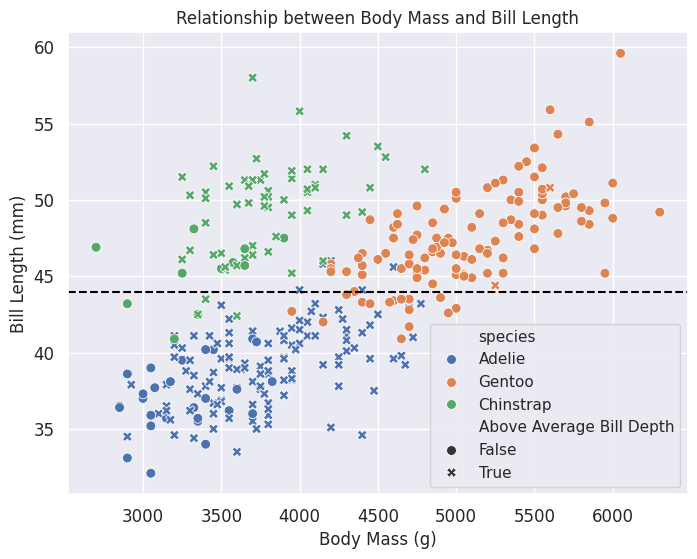

In [96]:
#New graph for penguin_data
plt.figure(figsize=(8,6))

#Create a new column based on bill depth
penguins_data['Above Average Bill Depth'] = penguins_data['bill_depth_mm'] > penguins_data['bill_depth_mm'].mean()

sns.scatterplot(data=penguins_data, x = 'body_mass_g', y = 'bill_length_mm',
             hue = 'species', style = 'Above Average Bill Depth',
             s = 50, marker = 'o')

#Personalize the graph
plt.title('Relationship between Body Mass and Bill Length')
plt.xlabel('Body Mass (g)', fontsize=12)
plt.ylabel('Bill Length (mm)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axhline(y=penguins_data['bill_length_mm'].mean(),
            color='black', linestyle='--') #Divisor line

#Display graph
plt.show()